### **Random Simulation Analysis of Active Brownian Particles**

---

#### **1. Introduction**

Active Brownian Particles (ABPs) are self-propelled microscopic particles that convert energy from their environment into directed motion. These particles are widely studied in physics, chemistry, and biology for their applications in understanding microscale dynamics. This project aims to numerically simulate the motion of ABPs, validate their theoretical models of directional autocorrelation and mean squared displacement (MSD), and investigate the influence of different parameters on their motion.

---

#### **2. Mathematical Model**

The motion of an ABP is governed by the following stochastic differential equations:

1. **Position evolution**:
   $$
   \frac{dx}{dt} = v \cos\phi(t), \quad \frac{dy}{dt} = v \sin\phi(t),
   $$
   where $v$ is the particle's velocity and $\phi(t)$ is its orientation angle at time $t$.

2. **Random rotation dynamics**:
   $$
   \frac{d\phi}{dt} = \xi(t),
   $$
   where $\xi(t)$ is Gaussian white noise with:
   $$
   \langle \xi(t) \rangle = 0, \quad \langle \xi(t)\xi(t') \rangle = 2D_R\delta(t-t'),
   $$
   where $D_R$ is the rotational diffusion coefficient.

3. **Directional autocorrelation**:
   $$
   C(t) = \langle \mathbf{n}(s) \cdot \mathbf{n}(s+t) \rangle = \exp(-t / \tau_R),
   $$
   where $\mathbf{n}(t) = (\cos\phi(t), \sin\phi(t))$ is the directional unit vector and $\tau_R = 1/D_R$ is the orientational persistence time.

4. **Mean squared displacement (MSD)**:
   $$
   \text{MSD}(t) = \langle |\mathbf{r}(t) - \mathbf{r}(0)|^2 \rangle,
   $$
   For $t \gg \tau_R$, the theoretical model predicts:
   $$
   \text{MSD}(t) \approx 4D_\text{eff}t, \quad D_\text{eff} = \frac{v^2 \tau_R}{2}.
   $$

---

#### **3. Numerical Methods**

- **Simulation Approach**:
  - Euler-Maruyama method was used to solve the stochastic differential equations.
  - Gaussian white noise was generated to model the random rotation dynamics.
- **Parameter Setup**:
  - Time step: $dt = 0.01$
  - Total simulation time: $T = 10$
  - Number of particles: $N = 1000$
  - Parameters: $D_R = [0.1, 0.5, 1, 5]$, $v = [0.5, 1.0, 2.0, 5.0]$.

---

#### **4. Results and Analysis**

##### **(1) Directional Autocorrelation**
The directional autocorrelation $C(t)$ was simulated under varying parameters and fitted to an exponential decay model:
$$
C(t) \approx \exp(-t/\tau_R).
$$

- **Fitting Results**:
  The fitted $\tau_R$ values align with the theoretical formula $\tau_R = 1/D_R$.
- **Visualization**:
  Below are plots showing $C(t)$ over time for different combinations of $D_R$ and $v$.

##### **(2) Mean Squared Displacement (MSD)**
The MSD was simulated for different parameter values and validated against the theoretical prediction:
$$
\text{MSD}(t) \approx 4D_\text{eff}t, \quad D_\text{eff} = \frac{v^2 \tau_R}{2}.
$$

- **Effective Diffusion Coefficient**:
  The simulation confirms the theoretical model for $D_\text{eff}$.
- **Visualization**:
  Below are plots comparing simulated MSD with the theoretical prediction for varying $D_R$ and $v$.

##### **(3) Parameter Influence Analysis**
- Increasing $D_R$ reduces $\tau_R$, causing faster decay in directional autocorrelation.
- Increasing $v$ accelerates the growth of MSD and raises the effective diffusion coefficient $D_\text{eff}$.

---

#### **5. Conclusion**

The numerical simulation successfully validated two key theoretical models for ABPs:
1. **Directional Autocorrelation**: The simulation aligns with the exponential decay model, and the fitted orientational persistence time $\tau_R$ is inversely proportional to $D_R$.
2. **Mean Squared Displacement**: The simulated MSD agrees with the theoretical prediction, confirming the effective diffusion coefficient formula.

Additionally, the analysis highlights the significant impact of $D_R$ and $v$ on particle motion, providing a deeper understanding of ABP dynamics.

---
#### **Appendix: Code and Plots**

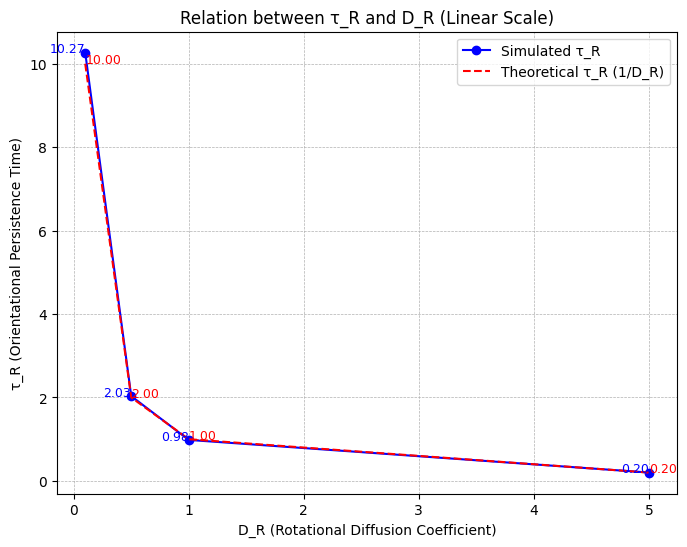

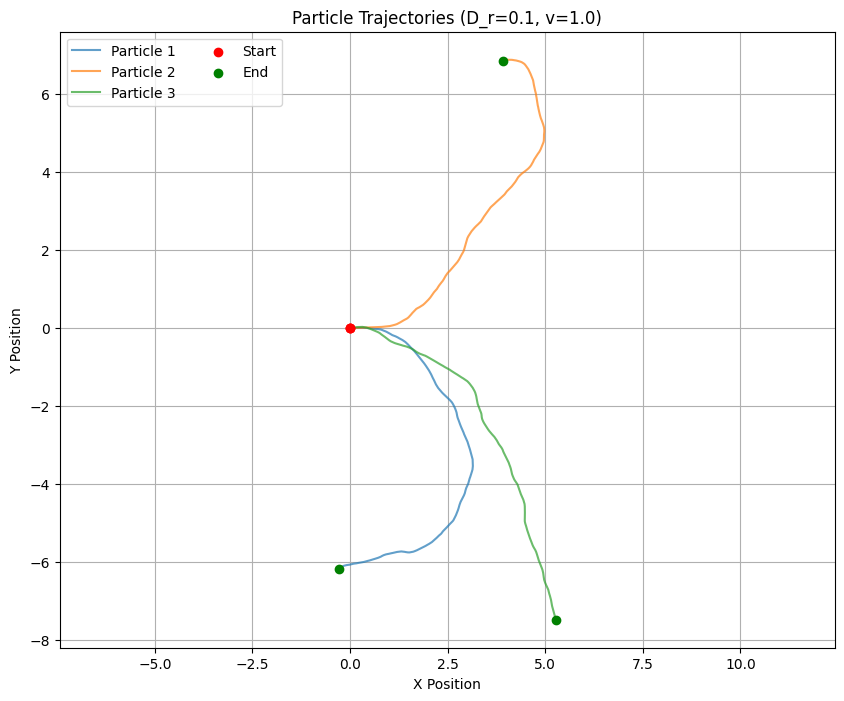

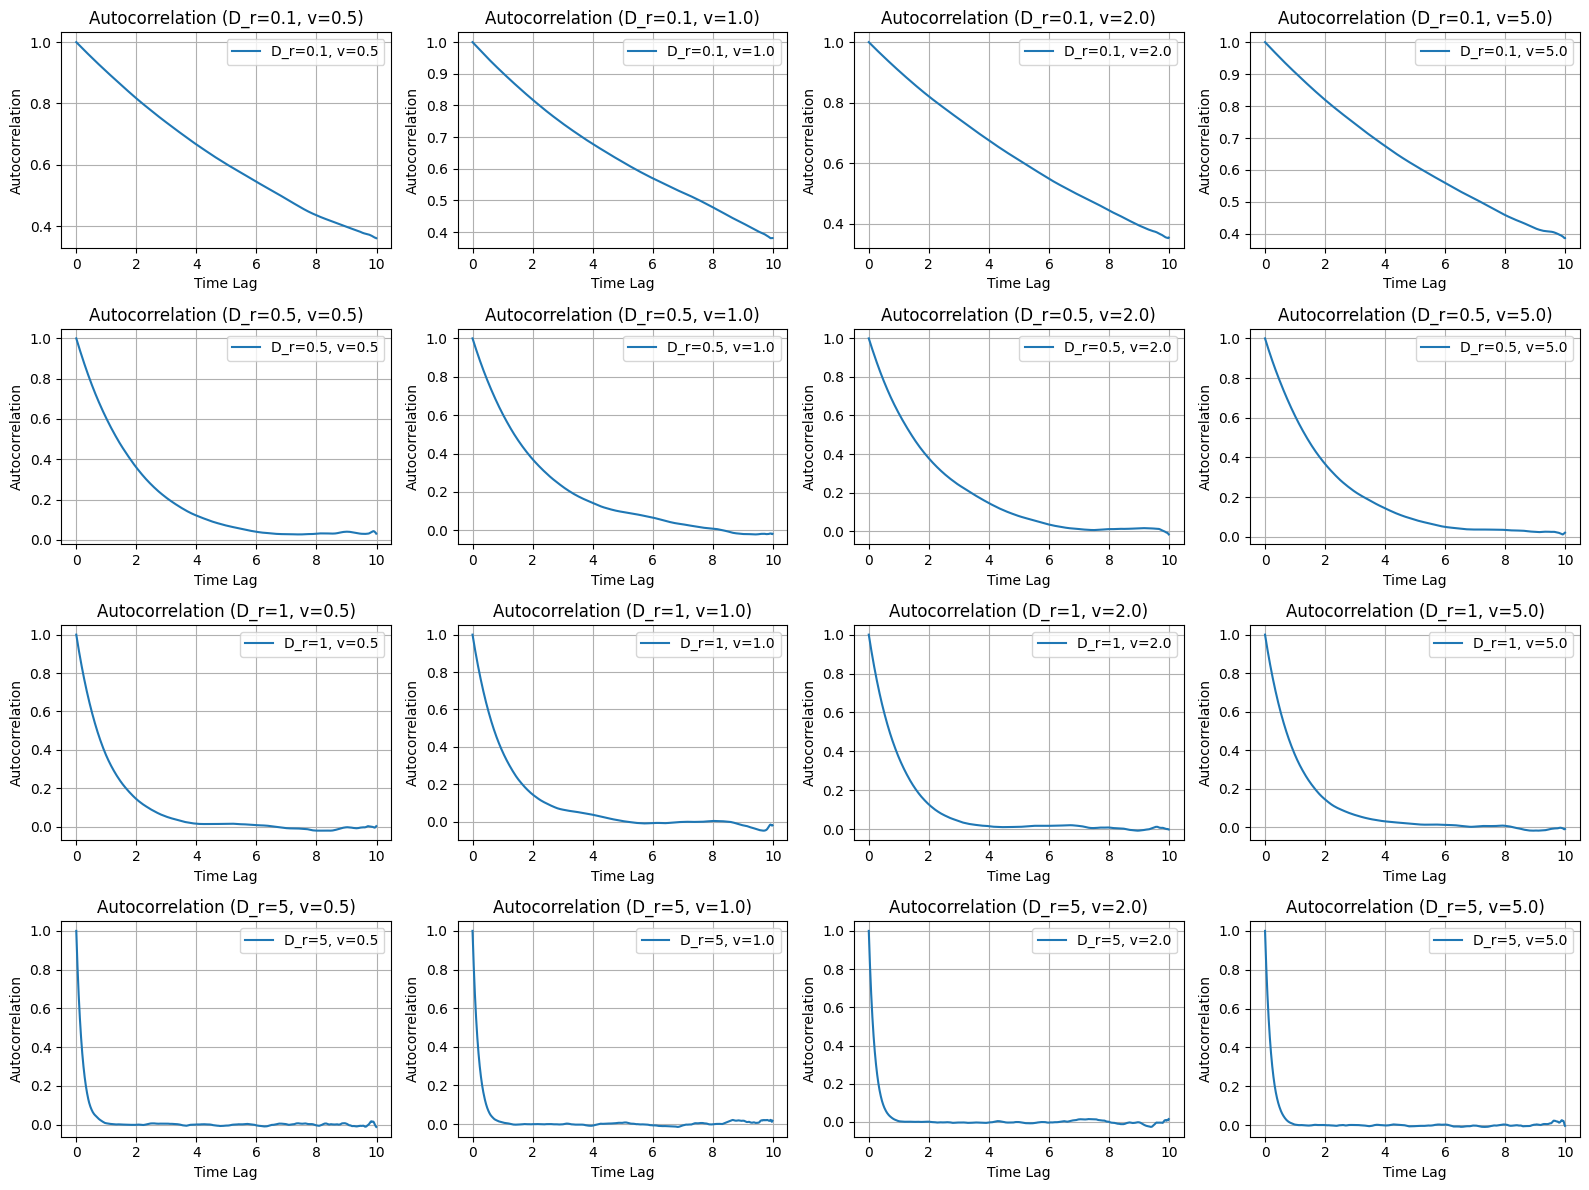

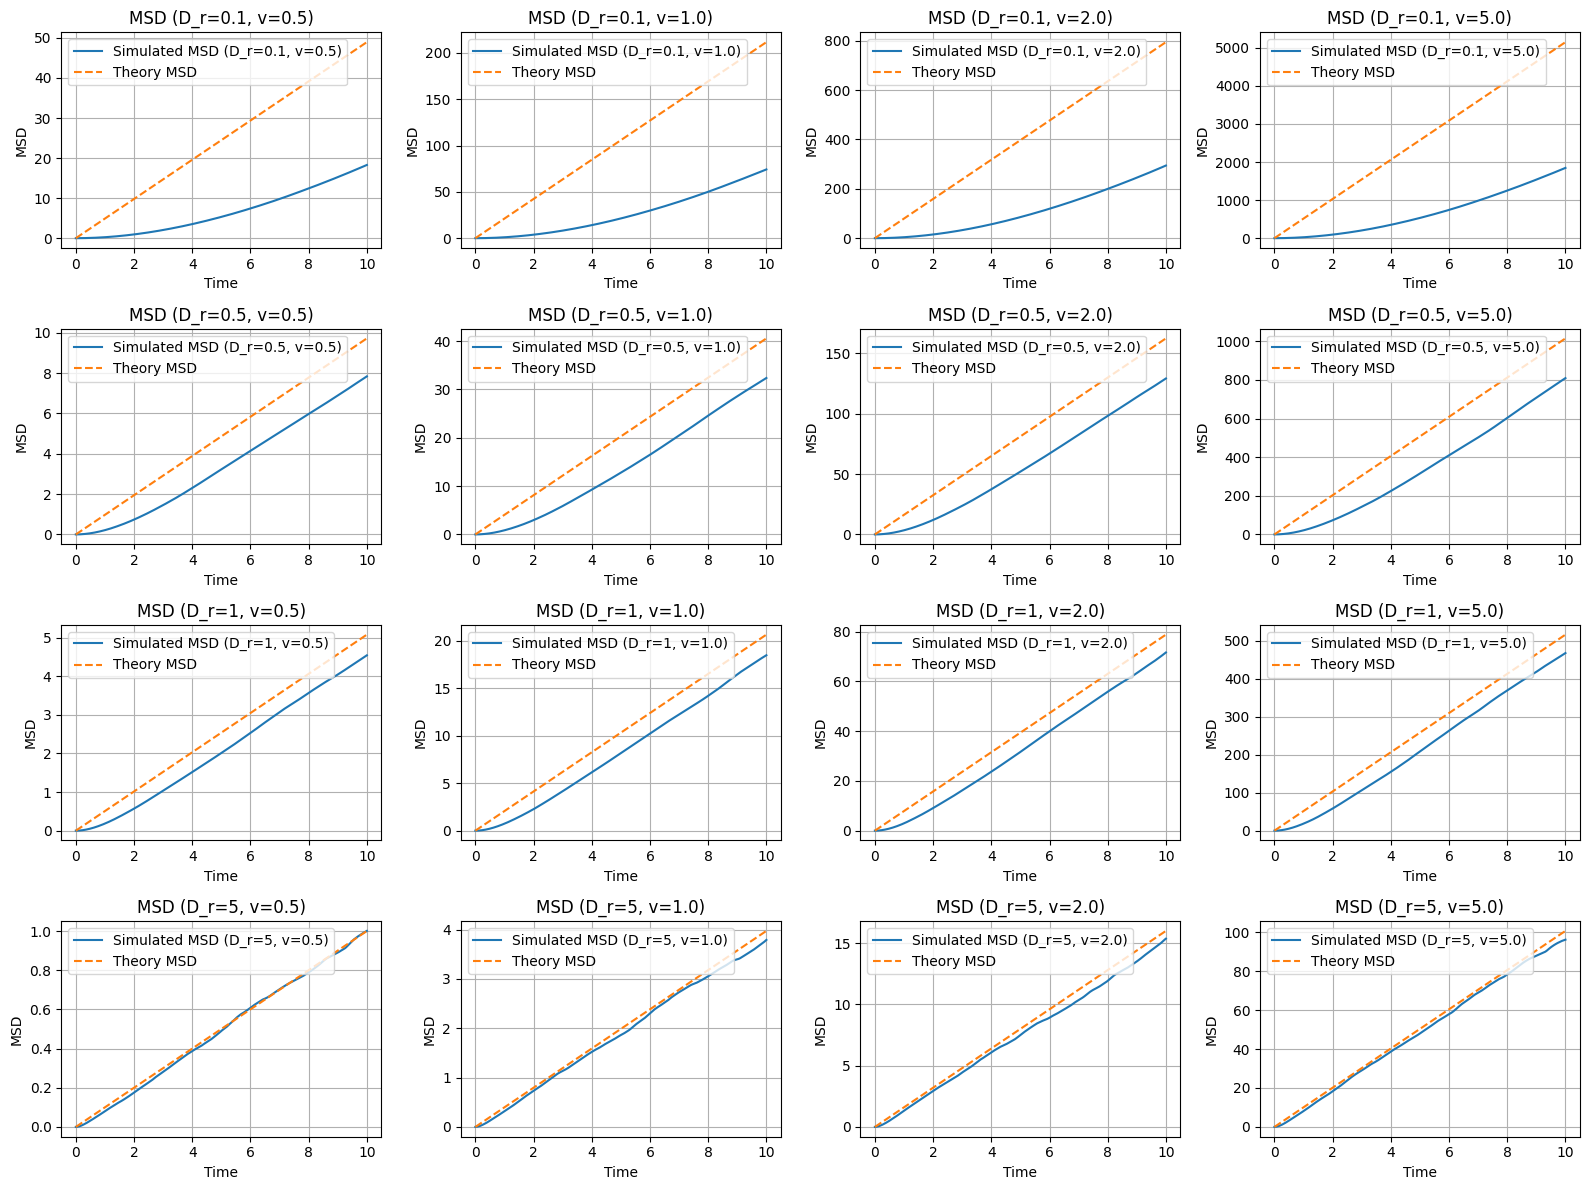

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 模拟方向角的随机扩散
def simulate_phi(dt, T, D_r, num_particles=1000):
    steps = int(T / dt)
    phi = np.zeros((num_particles, steps))
    for i in range(1, steps):
        noise = np.sqrt(2 * D_r * dt) * np.random.randn(num_particles)
        phi[:, i] = phi[:, i - 1] + noise
    time = np.linspace(0, T, steps)
    return time, phi

# 计算方向向量的自相关性
def compute_autocorrelation(phi, dt):
    n = np.array([np.cos(phi), np.sin(phi)])
    autocorr = []
    steps = phi.shape[1]
    for lag in range(steps):
        corr = np.mean(
            np.sum(n[:, :, :steps-lag] * n[:, :, lag:], axis=0)
        )
        autocorr.append(corr)
    time_lags = np.arange(steps) * dt
    return time_lags, np.array(autocorr)

# 模拟粒子的二维运动
def simulate_positions(v, phi, dt):
    x = np.zeros_like(phi)
    y = np.zeros_like(phi)
    for i in range(1, phi.shape[1]):
        x[:, i] = x[:, i - 1] + v * np.cos(phi[:, i]) * dt
        y[:, i] = y[:, i - 1] + v * np.sin(phi[:, i]) * dt
    return x, y

# 计算均方位移 (MSD)
def compute_msd(x, y):
    displacements = (x - x[:, 0, None])**2 + (y - y[:, 0, None])**2
    msd = np.mean(displacements, axis=0)
    return msd

# 指数衰减函数，用于拟合自相关性
def exp_decay(t, tau):
    return np.exp(-t / tau)

# 参数设置
dt = 0.01
T = 10
num_particles = 1000

D_r_values = [0.1, 0.5, 1, 5]
v_values = [0.5, 1.0, 2.0,5.0]

# 任务1: 计算并验证 τ_R 与 D_R 的关系
tau_R_values = []

for D_r in D_r_values:
    # 模拟方向角
    time, phi = simulate_phi(dt, T, D_r, num_particles)
    # 计算方向向量的自相关性
    time_lags, autocorr = compute_autocorrelation(phi, dt)
    # 拟合自相关性
    popt, _ = curve_fit(exp_decay, time_lags, autocorr, maxfev=10000)
    tau_R = popt[0]
    tau_R_values.append(tau_R)

# 可视化 τR 和 DR 的关系
plt.figure(figsize=(8, 6))
plt.plot(D_r_values, tau_R_values, 'o-', label="Simulated τ_R", color='blue')
plt.plot(D_r_values, 1 / np.array(D_r_values), '--', label="Theoretical τ_R (1/D_R)", color='red')
for i, D_r in enumerate(D_r_values):
    plt.text(D_r, tau_R_values[i], f"{tau_R_values[i]:.2f}", fontsize=9, color='blue', ha='right')
    plt.text(D_r, 1/D_r, f"{(1/D_r):.2f}", fontsize=9, color='red', ha='left')
plt.xlabel("D_R (Rotational Diffusion Coefficient)")
plt.ylabel("τ_R (Orientational Persistence Time)")
plt.title("Relation between τ_R and D_R (Linear Scale)")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# 任务2: 可视化粒子运动轨迹
D_r = 0.1
v = 1.0
# 模拟方向角和粒子位置
time, phi = simulate_phi(dt, T, D_r, 3)
x, y = simulate_positions(v, phi, dt)

# 绘制粒子运动轨迹
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(x[i], y[i], alpha=0.7, label=f"Particle {i+1}" if i < 5 else "")  # 仅显示前5个标签
plt.scatter(x[:, 0], y[:, 0], color='red', label="Start", zorder=5)
plt.scatter(x[:, -1], y[:, -1], color='green', label="End", zorder=5)
plt.title(f"Particle Trajectories (D_r={D_r}, v={v})")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper left", fontsize=10, ncol=2)
plt.grid(True)
plt.axis('equal')
plt.show()
# 任务3: 可视化方向自相关性
results = {}

for D_r in D_r_values:
    for v in v_values:
        # 模拟方向角
        time, phi = simulate_phi(dt, T, D_r, num_particles)
        # 计算方向向量的自相关性
        time_lags, autocorr = compute_autocorrelation(phi, dt)
        # 拟合自相关性
        popt, _ = curve_fit(exp_decay, time_lags, autocorr, maxfev=10000)
        tau_R = popt[0]
        # 模拟粒子位置
        x, y = simulate_positions(v, phi, dt)
        # 计算均方位移 (MSD)
        msd = compute_msd(x, y)
        # 验证理论公式
        D_eff = v**2 * tau_R / 2
        msd_theory = 4 * D_eff * time  # 理论 MSD
        # 存储结果
        results[(D_r, v)] = {
            'time_lags': time_lags,
            'autocorr': autocorr,
            'tau_R': tau_R,
            'time': time,
            'msd': msd,
            'msd_theory': msd_theory,
            'D_eff': D_eff
        }

# 可视化方向自相关性
plt.figure(figsize=(16, 12))
for i, (D_r, v) in enumerate(results.keys()):
    plt.subplot(len(D_r_values), len(v_values), i + 1)
    res = results[(D_r, v)]
    plt.plot(res['time_lags'], res['autocorr'], label=f"D_r={D_r}, v={v}")
    plt.title(f"Autocorrelation (D_r={D_r}, v={v})")
    plt.xlabel("Time Lag")
    plt.ylabel("Autocorrelation")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


# 任务4: 计算并验证均方位移 MSD
plt.figure(figsize=(16, 12))
for i, (D_r, v) in enumerate(results.keys()):
    plt.subplot(len(D_r_values), len(v_values), i + 1)
    res = results[(D_r, v)]
    plt.plot(res['time'], res['msd'], label=f"Simulated MSD (D_r={D_r}, v={v})")
    plt.plot(res['time'], res['msd_theory'], '--', label="Theory MSD")
    plt.title(f"MSD (D_r={D_r}, v={v})")
    plt.xlabel("Time")
    plt.ylabel("MSD")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()